# L11: Introduction to Machine Learning

**Sources and additional reading:**
- Goodfellow et al., [Deep Learning](https://www.deeplearningbook.org/)
- Bishop, [Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)
- Ng et al., [Lecture notes on machine learning](https://cs229.stanford.edu/main_notes.pdf)
- Dawid et al., [Modern applications of machine learning in quantum sciences](https://arxiv.org/ftp/arxiv/papers/2204/2204.04198.pdf)
- Mehta et al., [A high-bias, low-variance introduction to Machine Learning for physicists](https://arxiv.org/abs/1803.08823)
- Image credits: François Lanusse, dataiku, google developer

## Definition: Machine Learning aka what does it mean for a machine to learn?

According to Samuel in 1959 (not fully clear attribute):

Field of study that gives computers the ability to learn without being explicitly programmed.

But what does learning mean in this context? According to [Mitchell, 1997](http://www.cs.cmu.edu/~tom/files/MachineLearningTomMitchell.pdf):

A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$.

Taken together this means that in order to make a machine learn we need the following ingredients:
- A task $T$ to learn,
- Experience $E$ which is essentially equivalent to data $D$,
- A performance measure $P$,
- A model $M$ that can be tuned to solve the task $T$.

### Setup

Let $\boldsymbol{x}, \boldsymbol{y}$ be two $n$-, respectively $m$-dimensional vectors. 

### The task $T$

Many different types of tasks exist in Machine Learning (ML), but the most common type is to learn the relation between an input variable (or features) $\boldsymbol{x}$ and an output variable $\boldsymbol{y}$, i.e. $\boldsymbol{y}(\boldsymbol{x})$.

Two important examples of of tasks are regression and classification:

**Regression:** The classical situation of regression is that we assume an immediate relation between the input and the output variables, $\boldsymbol{x}, \boldsymbol{y}$. The objective of regression is to find a function $f$ that yields the mapping between $\boldsymbol{x}$ and $\boldsymbol{y}$, i.e. $\boldsymbol{y}=f(\boldsymbol{x})$, for all $\boldsymbol{x}, \boldsymbol{y}$. Practically, optimizing over all input/output pairs and all functions is impossible, and so we resort to a finite data set for which we find the optimal model. An example would be the prediction of house prices given a set of parameters such as location, number of bedrooms, size etc. 

**Classification:** In classification we usually seek to determine to which of $k$ predefined categories a given input $\boldsymbol{x}$ belongs. More specifically, we  try to find a function $f$ that yields a mapping between the input variable and the $k$ categories, i.e. $f: \mathbb{R}^n\to \{1,\cdots,k\}$ such that $\boldsymbol{y}=f(\boldsymbol{x})$. An example would be determining if a picture shows a dog or a cat. 

### The experience $E$

Experience in ML comes in form of a finite amount of data. To be more precise, data usually consists of a data set $\mathcal{D}$ that contains a finite amount of data instances often called data points, $\boldsymbol{x}=(x_1,\cdots,x_n)$. These can come as is, i.e. $\mathcal{D} = \{x_i\}$, or they can be accompanied by predefined labels or targets $\boldsymbol{y}=(y_1,\cdots,y_n)$ , i.e. $\mathcal{D} = \{(x_i, y_i )\}$.

Depending on the structure of the data at-hand, we can distinguish two different types of learning algorithms:

**Supervised learning algorithms:** Supervised learning algorithms are ML algorithms that learn from labeled data, i.e. $\mathcal{D} = \{(x_i, y_i)\}$. These encompass both regression and classification tasks described above. In a probabilistic interpretation, the algorithm learns the conditional probability distribution $p(\boldsymbol{y}|\boldsymbol{x})$ or some of its properties (in standard ML, most often the mean).

Examples: All regression and classification problems are examples of supervised learning.

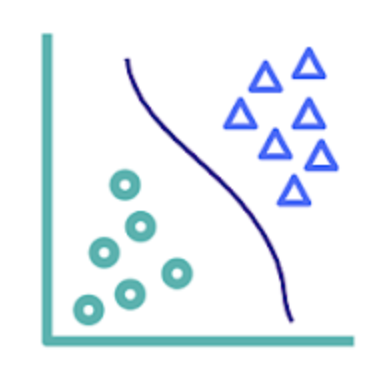

**Unsupervised learning algorithms:** These types of algorithms usually experience an unlabeled data set, i.e. $\mathcal{D} = \{(x_i)\}$, which could be due to lack of labels, and then learn useful properties of these data. Often the goal is to learn the probability distribution underlying the data $\boldsymbol{x}$ either explicitly or implicitly. A classic application of unsupervised learning is to find suitable representations of a given data set. E. g. we could try to find representations that retain the maximum amount of information about the initial data while either making the information simpler or more accessible than the data itself. In a probabilistic interpretation, the algorithm learns the probability distribution $p(\boldsymbol{x})$ or some of its properties (in standard ML, most often the mean).

Examples: clustering, i.e. subdividing the data into clusters with similar properties, or dimensionality reduction (e.g. Principal Component Analysis).

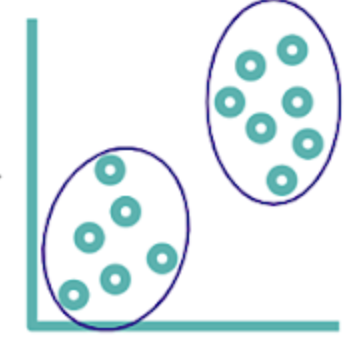

### The performance measure $P$

In order to evaluate the performance of an ML algorithm for a specific task $T$, we need a quantitative measure, which is the performance measure $P$. We can then use this measure to improve the given model if needed. Usually, performance measures are closely related to the task performed by the ML algorithm. An example is the mean-squared error loss in a supervised learning setting, i.e. $$MSE=\frac{1}{n}\sum_i (y_i-f(x_i))^2,$$ where $x_i, y_i$ are the data points, and $f$ denotes the learned function.

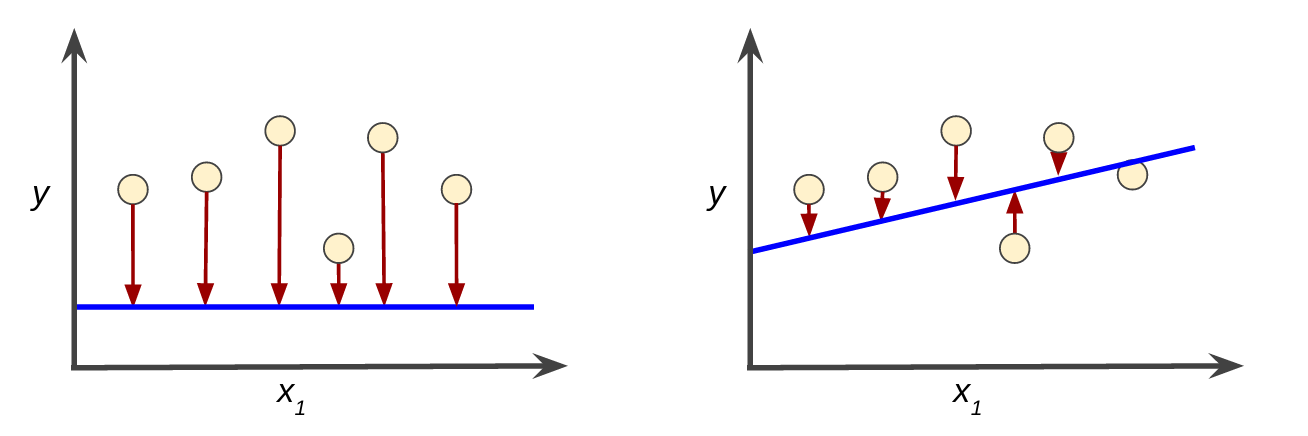

### The model $M$

Finally, we need a model $M$ that is able to learn to solve a given task. Practically, this is a class of functions $f$ (e.g. linear functions) of the input data $\boldsymbol{x}$ whose parameters can be tuned to best fit the data at hand. An example are the Neural Network models discussed below.

### How do machines learn?

Given all of this, machines learn performing a task $T$ by optimizing the parameters of the model $M$ to minimize/maximize the performance measure $P$ for a given data set $D$ available to the algorithm.

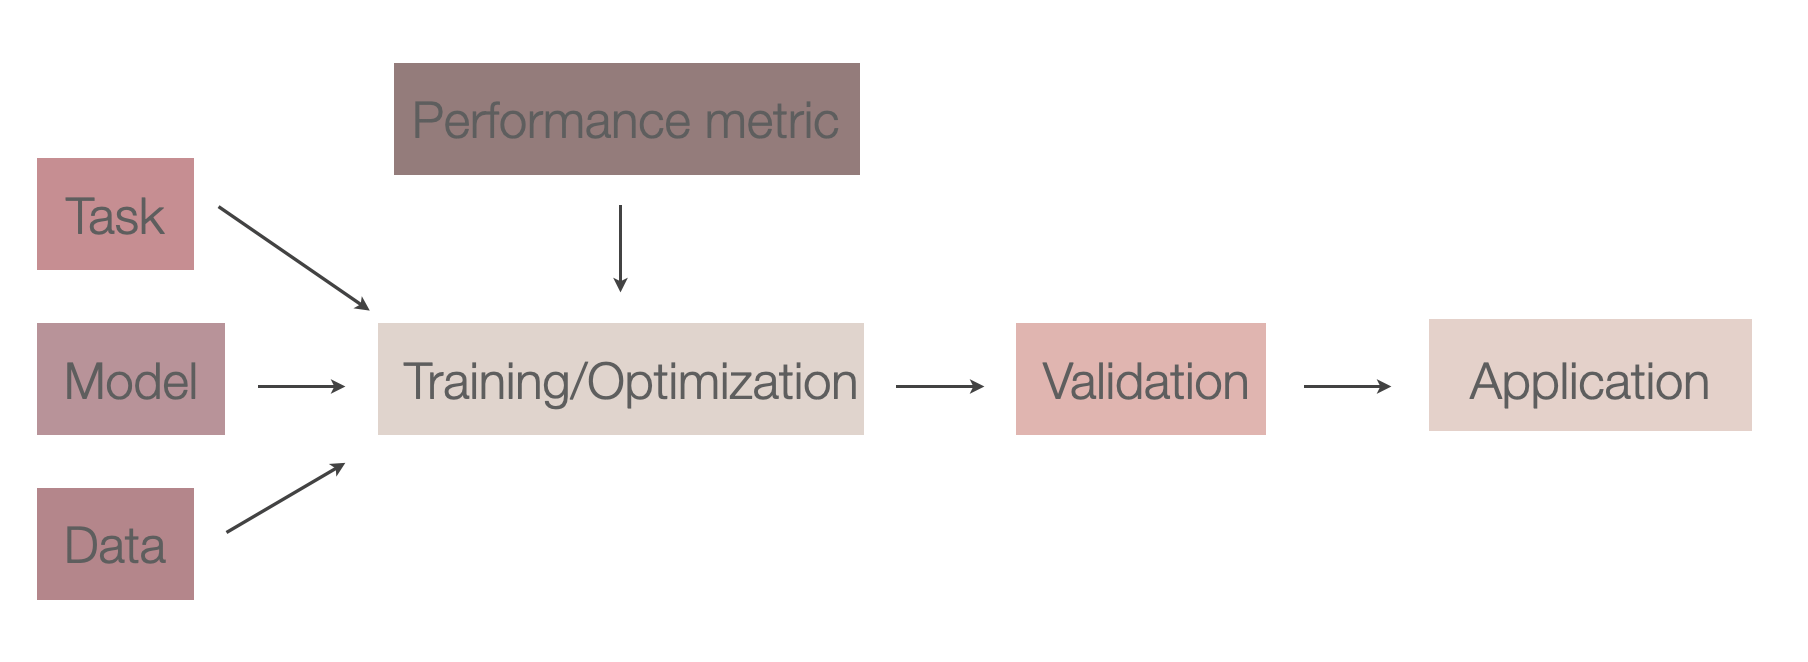

## Machine learning models - the supervised version

### Neural Networks

### Example: Housing prices

In our example, we will consider a data set of the house prices in Portland, OR. For a set of houses in Portland, the data gives the area in square feet, the number of bedrooms, the zip code and the wealth of the neighborhood as well as the corresponding price of the house. Let us first only focus on the size of the houses: We expect a linear relation between the house price, $\boldsymbol{y}$, and the size, $\boldsymbol{x}$, and so we can use least squares to find the optimal relation, parametrized by $$\boldsymbol{y}=f(\boldsymbol{x})=\boldsymbol{w}\boldsymbol{x} + \boldsymbol{b},$$ where we call $\boldsymbol{w}$ the weights and $\boldsymbol{b}$ the biases of our model.

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

In [2]:
data = np.genfromtxt('data/houses_Portland.txt', delimiter=',')

In [3]:
lsq_params = np.linalg.lstsq(np.vstack((data[:, 0], np.ones_like(data[:, 0]))).T, data[:, 2]*1e-3, rcond = None)[0]

Text(0, 0.5, 'price $[k\\$]$')

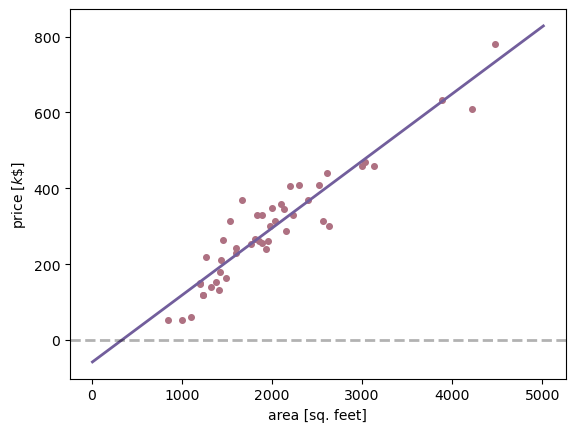

In [4]:
area = np.logspace(1, 3.7, 100)
model = lsq_params[0]*area+lsq_params[1]

plt.scatter(data[:, 0], data[:, 2]*1e-3, marker='.', color='#AE7182', s=65)
plt.plot(area, model, linewidth=2, color='#725e9c')
plt.axhline(y=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
plt.xlabel('area [sq. feet]')
plt.ylabel(r'price $[k\$]$')

Now we observe that our model is not ideal as it admits negative house prices for small sizes. We would like to remedy this shortcoming by defining a new model such that $$f(\boldsymbol{x})=\max\{\boldsymbol{w}\boldsymbol{x} + \boldsymbol{b},0\}.$$ This produces a kink in the predictions and is not a linear model of the data anymore.

Text(0, 0.5, 'price $[k\\$]$')

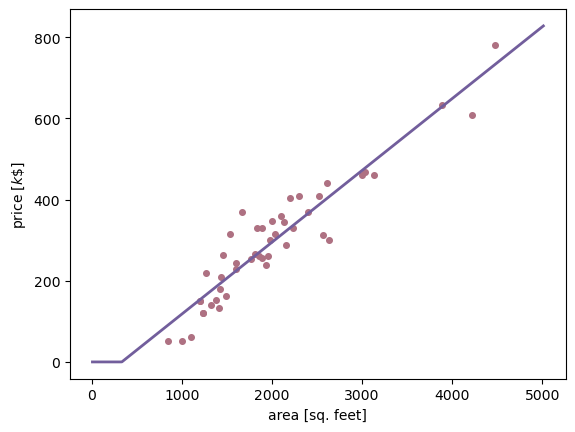

In [5]:
model[model<=0] = 0

plt.scatter(data[:, 0], data[:, 2]*1e-3, marker='.', color='#AE7182', s=65)
plt.plot(area, model, linewidth=2, color='#725e9c')
plt.xlabel('area [sq. feet]')
plt.ylabel(r'price $[k\$]$')

We have just created a neural network that consists of a single neuron. It is the combination of a linear function $\boldsymbol{z}=\boldsymbol{w}\boldsymbol{x} + \boldsymbol{b}$, and a nonlinear, so-called activation function $h(z)=\max\{0, z\}$, i.e. $f(\boldsymbol{x})=h(\boldsymbol{z}(\boldsymbol{x}))$. In ML, the function $h(z)=\max\{0, z\}$ is called a rectified linear unit or ReLU.

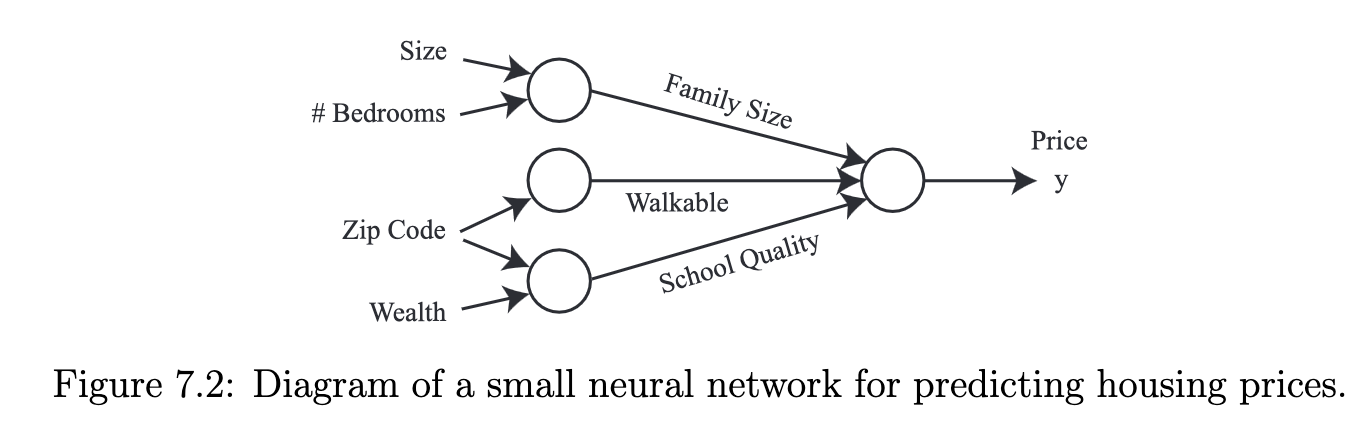

### Feedforward Neural Networks

A feedforward Neural Network (NN) is a model to approximate a given function $f^*(\boldsymbol{x})$. A feedforward NN defines a mapping between an input $\boldsymbol{x}$ and an output $\boldsymbol{y}$, $\boldsymbol{y}=f(\boldsymbol{x}, \boldsymbol{\theta})$, where $\boldsymbol{\theta}$ denotes the parameters of the NN, which it is optimized over. These types of models are called *feedforward* because information flows from $\boldsymbol{x}$ through the function $f$ (and the associated intervening steps) and finally to $\boldsymbol{y}$, but there is no possibility for outputs of the model to be fed back into the network. 

Feedforward NNs are called networks because they are typically constructed by concatenating a large number of relatively simple functions. The model can be reprensented by an acyclic graph (no loops) that illustrates how to combine all subfunctions together. If we denote the subfunctions as $f_i, i=1,\cdots, n$, then we can write the network as $f(\boldsymbol{x})=f_n(\cdots f_2(f_1(\boldsymbol{x}))))$. The function $f_1$ is called the first *layer* (or *input layer*) of the NN, $f_2$ is the second etc. The final layer is also called the *output layer*.

The input and output layers directly interact with the data $\boldsymbol{x}, \boldsymbol{y}$. In the input layer, the activations ("outputs") of the neurons are set to the input to the network, i.e. $\boldsymbol{x}$, while the activations of the last layer constitute the network's output. The behavior of all other layers is not directly specified by the training data and they are thus called hidden layers. 

Each layer typically consists of multiple nodes or units, which are also called *artificial neuron*. NNs in which each node in a given layer is connected to all nodes in the next layer are called *fully-connected*. The specific number and combination of layers and neurons is called the *architecture* of the NN.

A feedforward NN that only consists of fully-connected layers is often called a Multi-Layer Perceptron (MLP).

The figure below shows an illustration of a fully-connected feedforward NN with two hidden layers. 

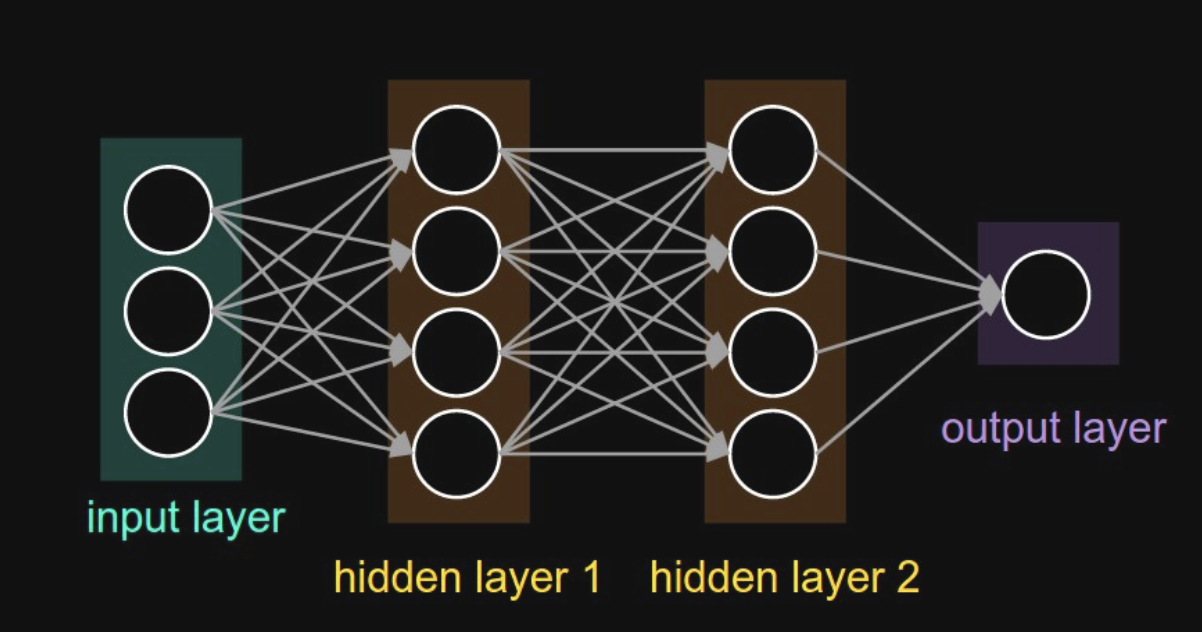

### Neurons as building blocks of NNs

As we have seen, the building blocks of NNs are the neurons. So what are these exactly?

Let $k$ denote a generic neuron in a NN layer consisting of $n$ units. Each neuron is specified by a set of weights $w_{ij}, i=1,\cdots, n, \; j=1,\cdots,m$ and biases $b_i$. Given an input vector $\boldsymbol{x} = (x_1,\cdots, x_m)$, it first computes a scalar linear combination as $$z_k=\sum_i w_{ki}x_i+b_k.$$ In a second step, it applies a nonlinear activation function $\sigma$ to produce its final output, also called activation as $$a_k = \sigma(z_k)=\sigma\left(\sum_i w_{ki}x_i+b_k\right).$$ The activation (i.e. the output of a neuron) is a scalar. The weights of a neuron control the strength of its connection to the neurons of the previous layer. 

There exist a number of popular activation functions used in NN, the most common ones being the ReLU activation function, the sigmoid and the tanh. These are illustrated below.

In [6]:
def sigmoid(x):
    '''Sigmoid activation function.'''

    return 1/(1+np.exp(-x))

def tanh(x):
    '''Tanh activation function.'''

    return np.tanh(x)

def ReLU(x):
    '''ReLU activation function. '''
    
    xtemp = copy.deepcopy(x)
    xtemp[x<=0]=0

    return xtemp

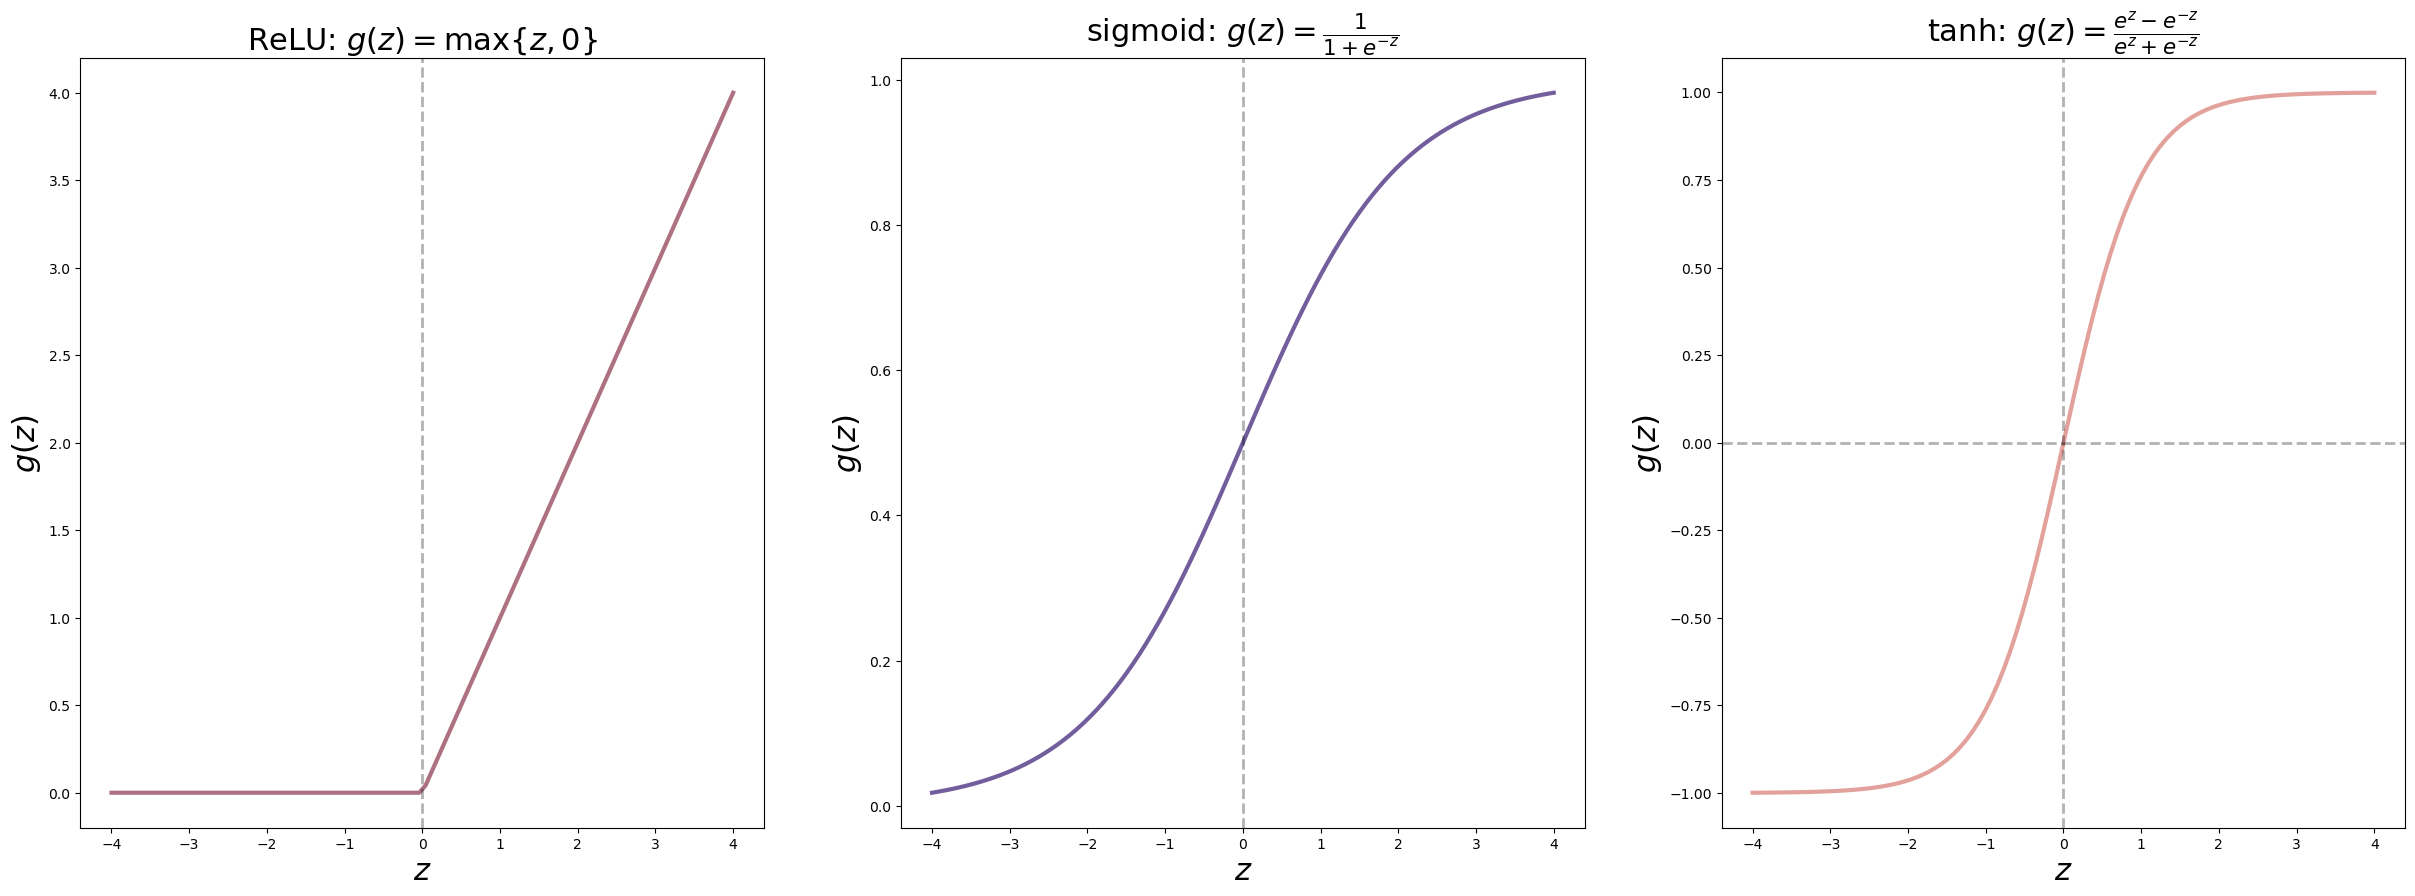

In [7]:
x = np.linspace(-4, 4, 100)

fig = plt.figure(figsize=(30, 10))
gs = GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.plot(x, ReLU(x), linewidth=3, color='#AE7182')
ax1.set_xlabel(r'$z$', size=22)
ax1.set_ylabel(r'$g(z)$', size=22)
ax1.set_title(r'ReLU: $g(z)=\max\{z, 0\}$', size=22)
ax1.axvline(x=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
ax2.plot(x, sigmoid(x), linewidth=3, color='#725e9c')
ax2.set_title(r'sigmoid: $g(z)=\frac{1}{1+e^{-z}}$', size=22)
ax2.set_xlabel(r'$z$', size=22)
ax2.set_ylabel(r'$g(z)$', size=22)
ax2.axvline(x=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
ax3.plot(x, tanh(x), linewidth=3, color='#e3a19c')
ax3.set_title(r'tanh: $g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$', size=22)
ax3.set_xlabel(r'$z$', size=22)
ax3.set_ylabel(r'$g(z)$', size=22)
ax3.axhline(y=0, linestyle='--', linewidth=2, color='k', alpha=0.3)
ax3.axvline(x=0, linestyle='--', linewidth=2, color='k', alpha=0.3)

### Multi-layer fully-connected NN

With this, we can now write the a generic, multi-layer, fully-connected NN as follows: Let $\boldsymbol{x}$ denote the input, $r$ is the number of layers of the NN and $W^1,\cdots,W^r$, $b^1,\cdots,b^r$ are the associated weights and biases. These are obtained by stacking the single-neuron weights and biases for each layer. Then we can write the full network as $$a^1 = \sigma(W^1x + b^1),$$ $$a^2 = \sigma(W^2a^1 + b^2),$$ $$\cdots,$$ $$a^{r-1} = \sigma(W^{r-1}a^{r-2} + b^{r-1}),$$ $$f(x) = W^{r}a^{r-1} + b^{r},$$ where we have made the assumption that we do not apply an activation function to the last layer (e.g. to allow for negative output).

### Why do we need nonlinear activation functions?

Wlog we can set $b^1=0$, $\sigma(z)=z$ and assume a two-layer NN. Then we have $$f(x)=W^2a^1=W^2\sigma(z^1)=W^2z^1=W^2W^1x=\tilde{W}x.$$ We see that without nonlinear functions, our NN collapses to a large linear function of the input variables, which is a consequence of the fact that applying a linear function to a linear function will result in another linear function.

### Why are NN useful?

### The universal approximation theorem (UAT)

The universal approximation theorem (first proven by Cybenko in 1989, [Approximation by Superpositions of a Sigmoidal Function](https://web.njit.edu/~usman/courses/cs675_fall18/10.1.1.441.7873.pdf)) states that: A feedforward NN with a linear output layer and at least one hidden layer with any "squashing" activation function can approximate any continuous function on a closed and bounded subset of $\mathbb{R}^n$.

**Note:** 

- The UAT only states that a given function can be represented with a large MLP. It does not guarantee that the training algorithm will be able to learn this function.
- The UAT does not specify the size of the NN needed to represent a given function. It can be shown that the required network size can grow exponentially with the complexity of the function. 
- There exist functions that can be approximated efficiently by an NN architecture with depth greater than $d$, but which require a much larger model if the depth is decreased to be smaller than $d$. These findings are the basis for why deep NNs are often preferred over shallow ones. 

## ML model optimization/training

Now that we understand what NNs are and why they are useful, the next question is: how do we find the optimal NN, or more general the optimal ML algorithm, for our problem? 

The key goal of ML is to obtain models that work well when employed in the "real world". This implies that a central requirement of any ML model is that it must perform well on new, unseen data (i.e. data other than the one it has been trained on). This is called the **generalization** ability of the model.

Typically in ML, we have access to a so-called **training set**. We can use these data to train our model to perform task $T$ by minimizing the performance measure (or loss function) $P$. We call this error the **training error** and the procedure described is essentially an optimization problem. What sets ML apart from optimization tasks is that we want to minimize the **generalization** or **test error** of our model as well. This is defined as the expectation value of the model error on a new input. Typically, the **test error** is estimated by evaluting the ML model on a so-called **test set**, which denotes a set of data collected separately from the training set. 

Under the asumption that both training and test set are generated by the same data-generating process, i.e. are iid, then we can study the relation between training and test error. In general, we can expect that for a randomly chosen model, the expected training and test errors are equal. Now when fitting an ML model, this is not what we do. Rather, we sample a training set, optimize the model parameters to reduce the training error and then sample the test set. Thus, we expect the test error to be greater or equal to the training error. 

We can now state the two factors that determine the overall performance of a ML model:
- Its abilitity to make the training error small.
- Its ability to make the difference between training and test error small.

These two requirements are the two key challenges in ML and thus have their own name: **underfitting**, or the inability of the model to obtain a small enough training error, and **overfitting**, the inability of the model to generalize to the test set. 

Let us first focus on the first challenge (we will come back to the second one later), i.e. how do we determine the parameters of an ML model that optimally approximate a given function $f^*(\boldsymbol{x})$? Wlog we can describe a general ML situation as follows: Let $\boldsymbol{x}, \boldsymbol{y}$ be the training data, and we would like to find a function $f$ such that $\boldsymbol{y}=f(\boldsymbol{x}, \boldsymbol{\theta})$, where $\boldsymbol{\theta}$ denotes the parameters of the model. In addition, we are also equipped with a performance measure or loss function $P$, which tells us how well our approximation is performing. We can fit the model by finding the values of $\boldsymbol{\theta}$ that minimize the loss function on the training data. The most popular algorithm in ML for minimizing a given function is gradient descent.

### Gradient descent

The gradient descent (GD) algorithm can be summarized as follows: 
1. Start at an initial position $\theta_0$.
2. Compute model predictions for the initial parameters and compute the associated loss $P(\theta_0)$.
3. Compute the gradients of the loss function with respect to the parameters $\theta$ at $\theta_0$ and then update the parameters according to $$v_t=\nabla_{\theta}P(\theta_t),$$ $$\theta_{t+1}=\theta_t-\eta_tv_t.$$ In the above, $\nabla_{\theta}P$ denotes the gradient of the loss function with respect to $\theta$, and $\eta_t$ is the so-called *learning rate*.

Intuitively, we can understand GD as follows: The gradient gives the direction of maximal increase of a given function, which means that the negative of this direction gives the maximal decrease. Therefore, the GD algorithm computes the direction of maximal increase and then updates model parameters by taking a step in the negative of this direction to minimize the target function.

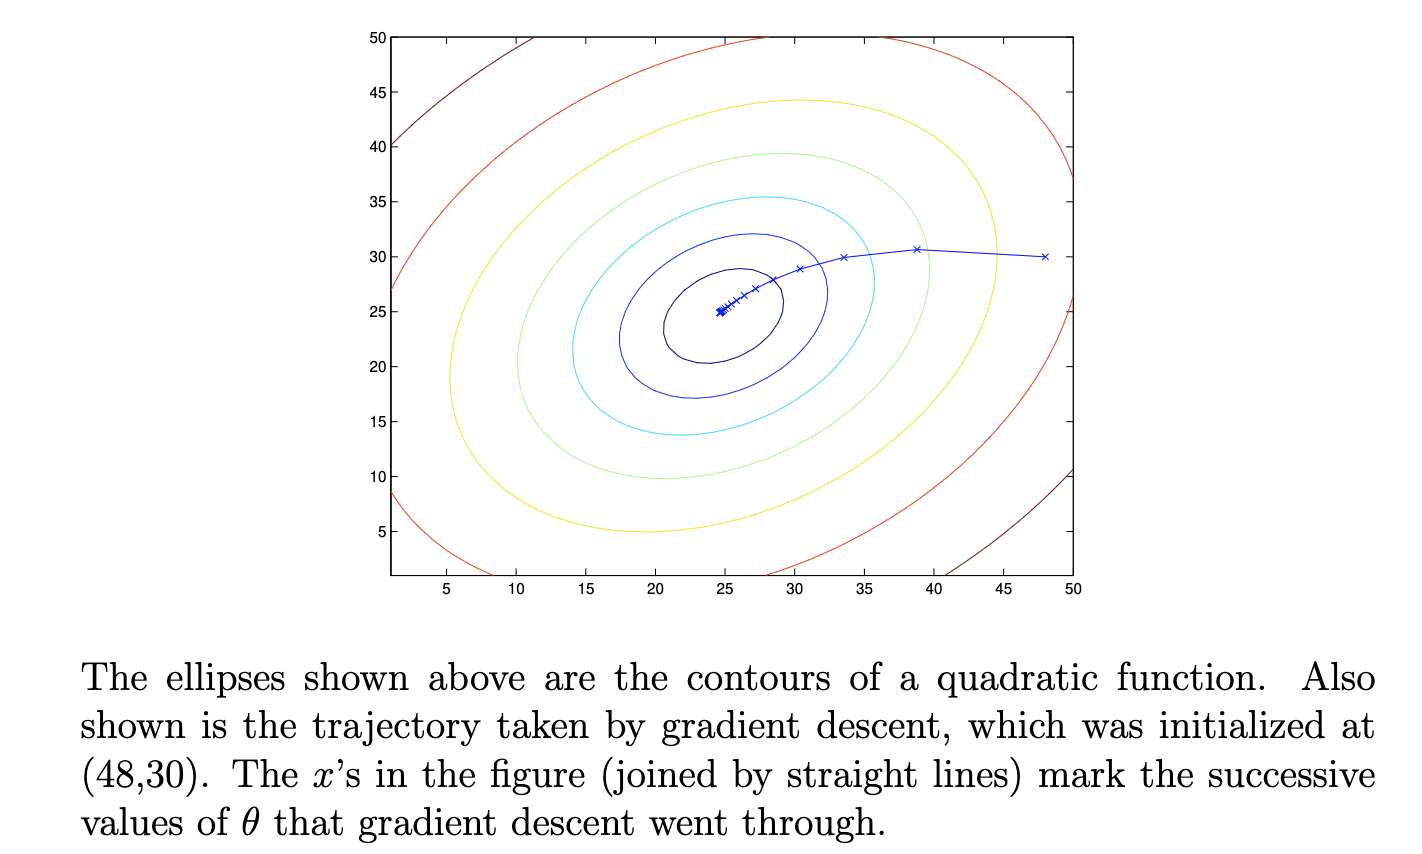

The length of the step taken by GD is determined by the learning rate $\eta_t$. For sufficiently small learning rate, GD methods will converge to a local minimum (in all directions) of the loss function. However, choosing a small $\eta_t$ comes at a significant computational cost. The smaller $\eta_t$, the more steps we have to take to
reach the local minimum. In contrast, if $\eta_t$ is too large, we can overshoot the minimum and the algorithm becomes unstable (it either oscillates or even moves away from the minimum). This is shown in the figure below. In practice, the learning rate is usually taken as one of the *hyperparameters* of the NN and we usually specify a “schedule” that successively decreases $\eta_t$. 

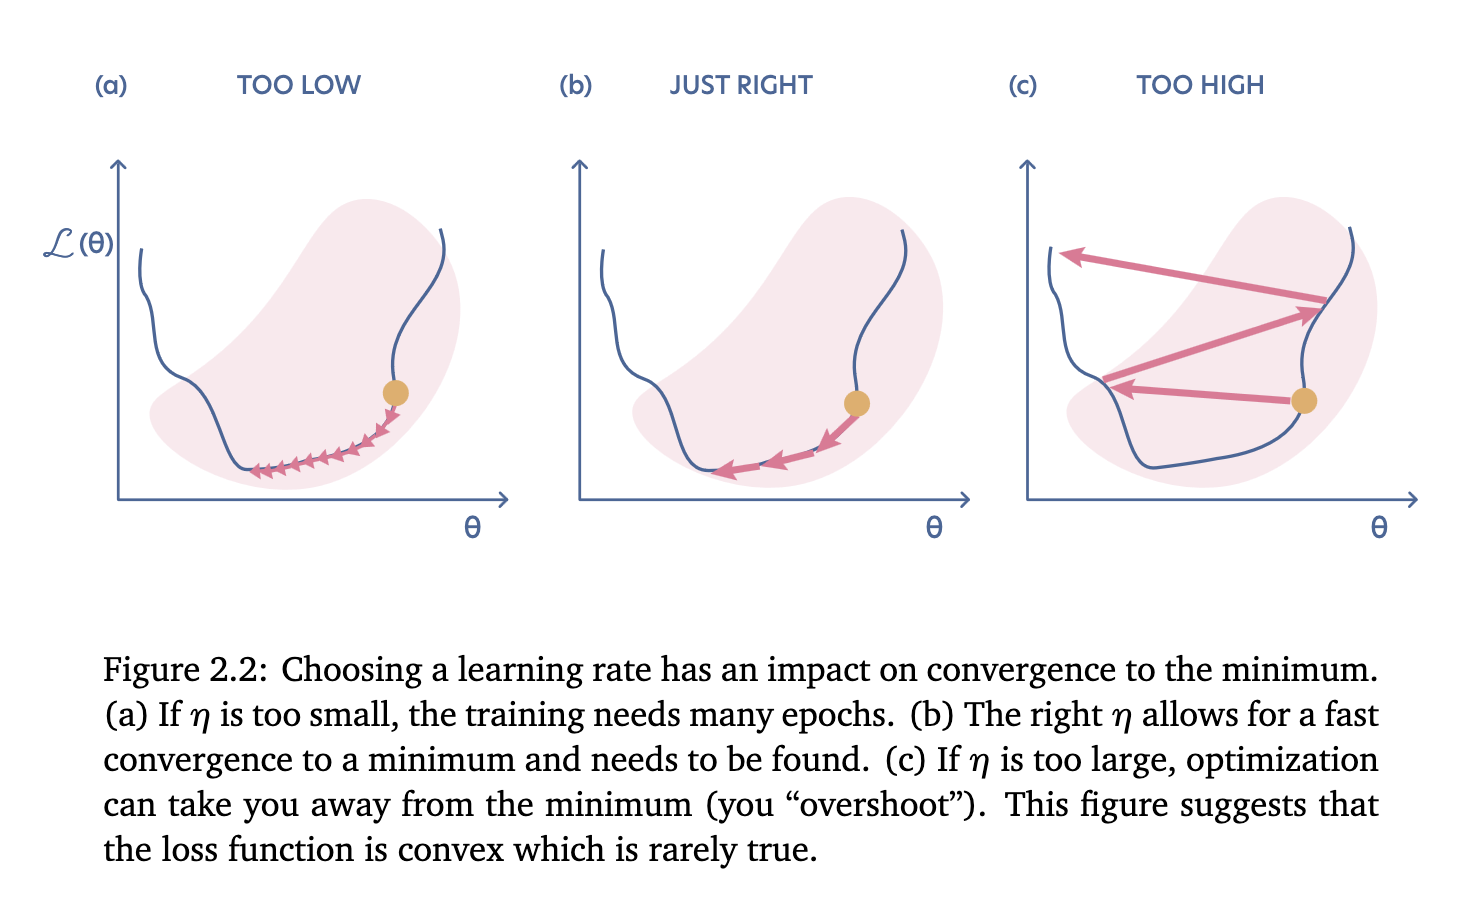

**Issues with GD:**
- GD converges deterministically to a local minimum. This can lead to poor performance in ML applications that usually feature complex loss functions with multiple local minima.
- For a large data set $\boldsymbol{x}, \boldsymbol{y}$, computing the loss function and thus the gradient becomes computationally very expensive.

### Stochastic gradient descent (with minibatches)

These two shortcomings can be alleviated through so-called *stochastic gradient descent* (SGD). In SGD, the gradient is approximated by computing it on a subset of the full data, called a minibatch. The size of the minibatches is usually significantly smaller than the total number of data points $n$, with typical minibatch sizes ranging from ten to a few hundred data points. If there are $n$ data points, and we subdivide them into minibatches of size $m$, we will end up having be $n/m$ minibatches. In SGD, at each gradient descent step we approximate the gradient using a single minibatch, and we then cycle over all $k = 1, \cdots, n/m$ minibatches one
at a time, and use the minibatch approximation to the gradient to update the parameters $\boldsymbol{\theta}$ at every step $k$.

Thus, in SGD, we replace the actual gradient over the full data at each gradient descent step by an approximation to the gradient computed using a minibatch. This has two important benefits. First, it introduces stochasticity and decreases the chance that our fitting algorithm gets stuck in isolated local minima. Second, it significantly speeds up the calculation as we do not have to use all $n$ data points to approximate the gradient.

**Note:** Some resources call the case $m=1$ stochastic gradient descent, while the case $1\lt m\lt n$ is called minibatch gradient descent.

### How to compute gradients - backpropagation

Training a NN requires the derivatives of the loss function with respect to all tunable model parameters, i.e. all weights and biases in all $L$ layers of the network. This could be done using numerical differentiation, but this approach is often unstable and imprecise. Given the fact that we can write NNs as a concatenation of simple functions, we can easily write down an analytic expression for its derivatives, but evaluating this expression can be time-consuming and therefore prohibitive for training NNs. Backpropagation is an algorithm that efficiently computes the gradient of the loss function, repeatedly applying the chain rule.

Let us illustrate backpropagation with an example: Specifically, let us consider a fully-connected feed-forward NN with $L$ layers, input data $\boldsymbol{x}$, and output $\boldsymbol{y}$. From before, we know that the activation in the $l$-th layer is given by $$a^{l} = \sigma(W^{l}a^{l-1} + b^{l})=\sigma(z^{l}),$$ and the final output of the NN can be written as $$f(\boldsymbol{x})=a^{L}(\boldsymbol{x}) = \sigma(W^{L}a^{L-1}(\boldsymbol{x}) + b^{L}).$$ The layered structure of NNs implies that the output $a^{L}(\boldsymbol{x})$ only depends on $\boldsymbol{x}$ through $a^{L-1}(\boldsymbol{x})$, which in turn only depends on $\boldsymbol{x}$ through $a^{L-2}(\boldsymbol{x})$ etc. 

Our task is now to compute the derivatives of some loss function $\ell=\ell(a^{L}(\boldsymbol{x}), \boldsymbol{y})$ with respect to all weights and biases in the NN, i.e. $\frac{\partial\ell}{\partial W}$, $\frac{\partial\ell}{\partial b}$. Focusing only on the weights for simplicity, we can write this using the chain rule as $$\frac{\partial\ell}{\partial W}=\frac{\partial\ell}{\partial a^{L}}\frac{\partial a^{L}}{\partial W}.$$ The first term depends on the loss function and can be computed analytically, so the main task is to compute the second term. Applying the chain rule we have: $$\frac{\partial a^{L}}{\partial W}=\frac{\partial a^{L}}{\partial z^{L}}\frac{\partial z^{L}}{\partial W}=\frac{\partial a^{L}}{\partial z^{L}}\left(\frac{\partial W^{L}}{\partial W}a^{L-1} + w^L\frac{\partial a^{L-1}}{\partial W}\right).$$ If $W$ is a weight of layer $L$, i.e. $W=W^L_{ij}$, then we have $$\frac{\partial a^{L}}{\partial W}=\frac{\partial a^{L}}{\partial z^{L}}e_i^La_j^{L-1},$$ where $e_i^L=1$ for $i$ and zero otherwise. If on the other hand $W$ is a weight from a lower layer we have $$\frac{\partial a^{L}}{\partial W}=\frac{\partial a^{L}}{\partial z^{L}}W^L\frac{\partial a^{L-1}}{\partial W}.$$ In order to evaluate this expression, we need to step back further into the NN and evaluate $\frac{\partial a^{L-1}}{\partial W}$, which is in turn given by $$\frac{\partial a^{L-1}}{\partial W}=\frac{\partial a^{L-1}}{\partial z^{L-1}}\left(\frac{\partial W^{L-1}}{\partial W}a^{L-2} + W^{L-1}\frac{\partial a^{L-2}}{\partial W}\right).$$ Thus we recognize a recursive relation to compute derivatives with respect to weights $W$ as $$\frac{\partial a^{L}}{\partial W}=\frac{\partial a^{L}}{\partial z^{L}}W^L\frac{\partial a^{L-1}}{\partial z^{L-1}}W^{L-1}\cdots \frac{\partial a^{l'+1}}{\partial z^{l'+1}}W^{l'+1} \frac{\partial a^{l'}}{\partial W},$$ if $w$ is not part of layers $l'$ to $L$, and $$\frac{\partial a^{L}}{\partial W}=\frac{\partial a^{L}}{\partial z^{L}}W^L\frac{\partial a^{L-1}}{\partial z^{L-1}}W^{L-1}\cdots \frac{\partial a^{l'+1}}{\partial z^{l'+1}}W^{l'+1} \frac{\partial a^{l'}}{\partial z^{l'}}e_i^{l'}a_j^{l'-1},$$ if it is part of layer $l'$.

The basic procedure of the backpropagation algorithm is now as follows: 

*Forward pass:* Walk through the network, compute all intermediate quantities $a^l$, and store them in memory.

*Backward pass:* Walk backwards through the network and compute the derivatives with respect of each layer, starting with the last one and using the results from the previous layer recursively.

**Note:** This procedure is very efficient, as it allows us to compute derivatives for multiple inputs $x_i$ in one go, i.e. we can compute the loss and the derivatives by walking through the network twice. Evaluating derivatives in forward-mode on the other hand, requires us to move through the network for each input $x_i$ individually, and is thus more computationally intensive but uses less memory.

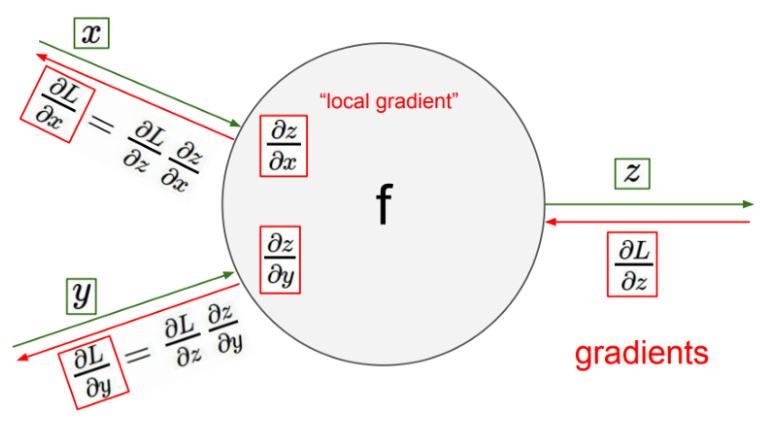

### Parameters in ML

ML models contain two types of parameters: *parameters* and *hyperparameters*.

*parameters:* All model parameters that are optimized for in the training step. Examples are the weights and biases of all nodes in NNs.

*hyperparameters:* All parameters of the ML model that need to be set before training starts. These can either affect the model or the optimization process. Examples are NN architecture, learning rate, number of epochs to train. Generally, the loss function is non-differentiable with respect to these parameters, and we thus cannot use GD to optimize for them. 

### The full ML workflow and generalization

We have now seen how to optimize the parameters of a given ML model using the training data. Two questions remain: 

(i) How do we optimize for the hyperparameters?, 
(ii) How do we test generalizability of our model?

Hyperparameter optimization is different from parameter optimization, consider for example the case of NN architecture: optimizing model complexity for a given training set will always pick the most complex model, which is not what we want if we want the model to generalize. So we need a new another approach to optimize hyperparameters. Aside: This is very similar to our discussion of cross-validation where the hyperparameter was the degree of the polynomial used to fit our data.

In order to solve this problem we proceed as follows: we subdivide the data into three different samples (cf. our discussion of cross-validation): a *training* sample, a *validation* sample, and a *test* sample. When determining the optimal model, we ultimately care about its generalization error, i.e. the performance $P$ of the model on some unseen test set. In order to optimize the model parameters, we minimize $P$ over the training set. We then use the validation set to estimate the generalization error during training, and update hyperparaters accordingly. Finally, the generalization error on unseen data is estimated using the test set. In ML, optimization is thus only performed indirectly as opposed to regular optimization tasks. 

With this, we arrive at the following general strategy for training ML and determining optimal parameters and hyperparameters:

- The *training sample* is used for determining the optimal ML model parameters for a given set of hyperparameters (e.g. learning rate, number of epochs to train).
- The *validation set* is used to evaluate model performance (generalization) for a given set of hyperparameters, and we choose the model which optimizes the combination of training and validation loss.
- The *test set* is used to evaluate model performance on unseen data (generalizability).

At this point you might wonder why we need separate *validation* and *test* samples, why can't we do everything with just the *test* set? The reason is that in order to obtain an unbiades estimate of our model's generalization error it is imperative that the test is not used in any way to make choices about our model. We therefore need to introduce an additional data set, which is the validation sample. The test set is only used to assess the performance of the final model (after all the tuning has been done).

Below you can see an illustration of these principles: the first plot shows the training and validation loss as a function of model complexity. As we have already seen when discussing cross-validation, the training error decreases steadily with model complexity while the validation error exhibits the U-shape characteristic of the *bias-variance tradeoff*.

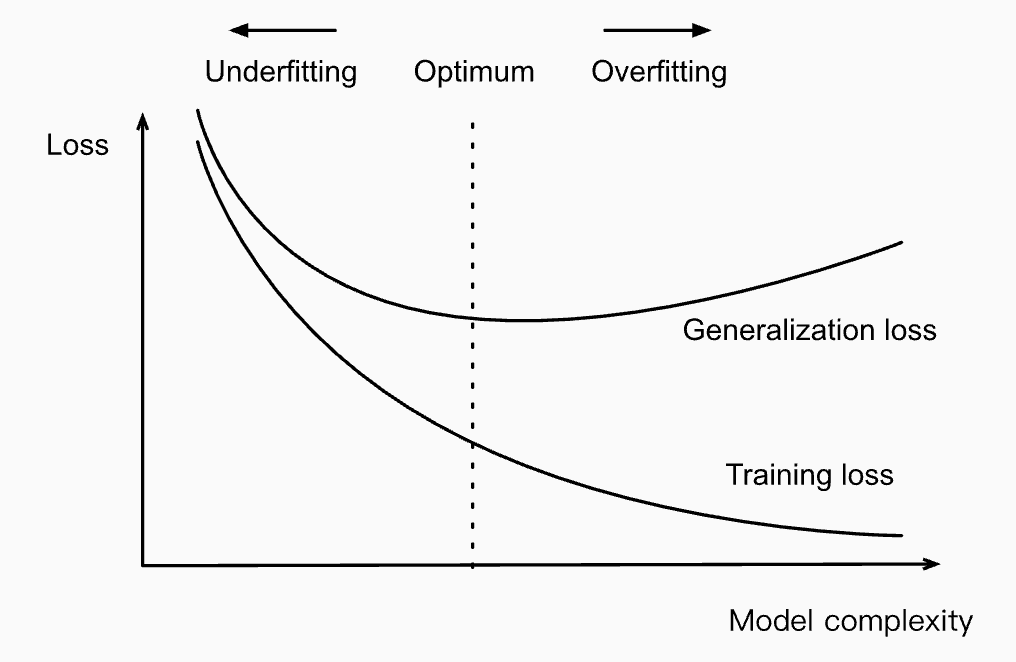

Very similarly, the validation error usually starts to increase after many training epochs as the model tends to start overfitting the training set when trained for many epochs: 

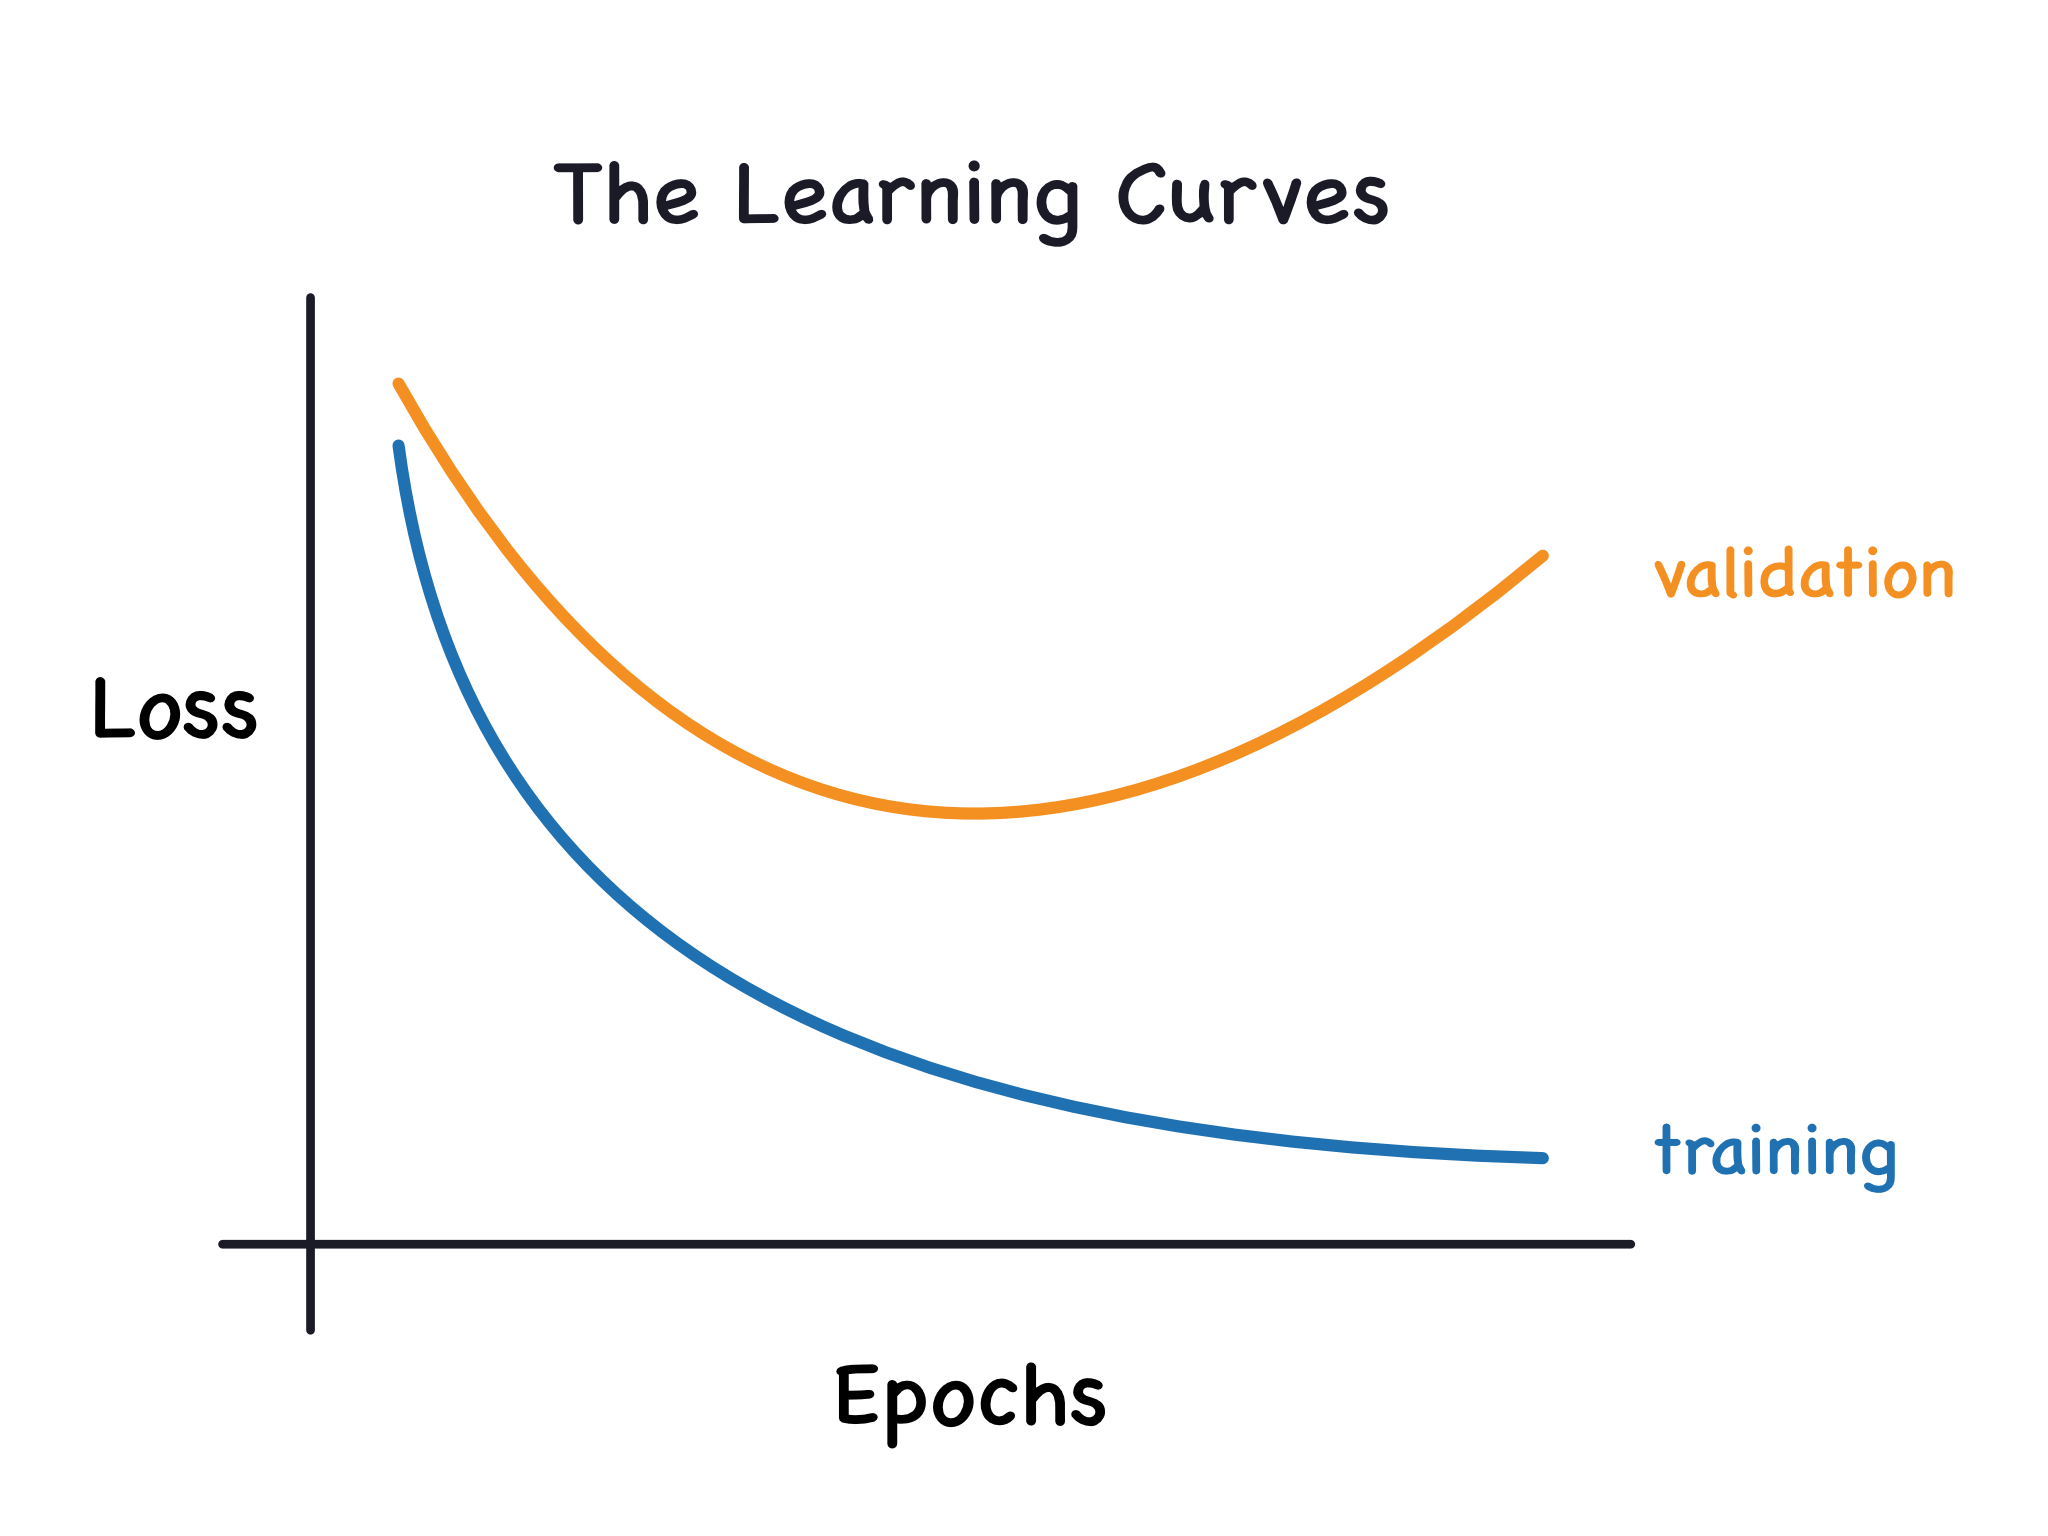

## Let's put all of this into practice

### Example: Regression for the California Housing Dataset using an MLP

In our practical example, we will look at the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). This dataset is a collection of house attributes such as number of rooms, median income of neighborhood, etc. as well as the price of that house.

In this example, we would like to train a MLP to predict house prices in California starting from the input data given in the California Housing dataset.

To do this, we will use `pytorch`, which we import below.

In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import fetch_california_housing

Now we define a data class that loads our data and transforms it into a form that can be used within `pytorch`.

In [102]:
class CaliDataset(torch.utils.data.Dataset):
    """
    Class for California housing dataset.
    """

    def __init__(self, X, y):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

Next, let's define our NN. Here I have chosen a very simple architecture, but you can experiment what happens if you change out some of the building blocks.

In [103]:
class model(nn.Module):
    """
    Multilayer Perceptron model for regression.
    """
    # Define architecture of NN
    # Here we use one linear input layer, a linear hidden layer and a linear output layer
    # and we use the ReLU activation function
    def __init__(self, inp, out, nh1, nh2):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Linear(inp, nh1),
          nn.ReLU(),
          nn.Linear(nh1, nh2),
          nn.ReLU(),
          nn.Linear(nh2, out)
        )

    # Specify what needs to be done in the forward pass
    def forward(self, x):
        """
        Forward pass (i.e. evaluate the model).
        """
        return self.layers(x)

Now that we have the most important building blocks, let's first load the data. Feel free to inspect the data a bit.

In [104]:
# Load California Housing dataset
X, y = fetch_california_housing(return_X_y=True)
data = np.vstack((X.T, y)).T

In [105]:
# Split into training, validation and test data
traindata = data[:int(0.7*len(data))]
valdata = data[int(0.7*len(data)):int(0.85*len(data))]
testdata = data[int(0.85*len(data)):]

# Compute mean and std of training data
training_mean = np.mean(traindata, axis=0)
training_std = np.std(traindata, axis=0, ddof=1)

# Normalize
traindata = (traindata-training_mean[np.newaxis, :])/training_std[np.newaxis, :]
valdata = (valdata-training_mean[np.newaxis, :])/training_std[np.newaxis, :]
testdata = (testdata-training_mean[np.newaxis, :])/training_std[np.newaxis, :]

# Create pytorch data loaders for training and validation data
minibatch = 100
train_dataset = CaliDataset(traindata[:, :8], traindata[:, -1])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=minibatch, shuffle=True)
val_dataset = CaliDataset(valdata[:, :8], valdata[:, -1])
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=minibatch, shuffle=True)

Now let's initialize our NN and define a bunch of other stuff.

In [106]:
# Initialize the MLP
nin = X.shape[1]
nout = 1
nh1 = 64
nh2 = 32
mlp = model(nin, nout, nh1, nh2)

# Define the loss function 
loss_function = nn.MSELoss(reduction='sum')
# Define the optimizer
# Here we use the ADAM algorithm that is an extension of stochastic gradient descent which uses a  
# different learning rate for each parameter and also adapts it during runtime
# Here we set the initial learning rate to 1e-3 (which is also the default in pytorch)
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

In [107]:
min_valid_loss = np.inf

# Run the training loop
train_losses = []
val_losses = []
for epoch in range(0, 100): # 100 epochs at maximum
    print('Starting epoch {}.'.format(epoch+1))

    # Set current loss value
    current_loss = 0.0

    # Iterate over the minibatches in DataLoader for training data
    for i, databatch in enumerate(trainloader, 0):
        # Get and prepare inputs
        inputs, targets = databatch
        # Because gradients are accumulated during backprop, we need to zero them for each 
        # minibatch so that we start fresh and don't use old information
        optimizer.zero_grad()
        # Perform forward pass, i.e. evaluate the NN
        outputs = mlp(inputs.float())
        # Compute loss
        loss = loss_function(outputs.squeeze(), targets.float())
        # Perform backward pass, i.e. compute the gradients
        loss.backward()
        # Perform optimization, i.e. adapt weights and biases
        optimizer.step()
        # Compute current loss
        current_loss += loss.item()/inputs.shape[0]
        
    train_losses.append(current_loss)
    
    # Compute validation loss
    valid_loss = 0.0
    for x, y in valloader:
        # Tell pytorch that we don't do any optimization, i.e. we just want to evaluate the NN
        with torch.no_grad():
            y_NN = mlp(x.float())
            valid_loss += (loss_function(y_NN.squeeze(), y).item())/x.shape[0]
    val_losses.append(valid_loss)

    # Define our stopping criterion
    # Stop training after 100 epochs or if validation loss has not fallen in 10 epochs
    if valid_loss >= min_valid_loss:
        badepochs += 1
    else:
        min_valid_loss = valid_loss
        badepochs = 0
    if badepochs == 10:
        print('Stopping training due to non-decreasing validation loss.')
        break

Starting epoch 1.
Starting epoch 2.
Starting epoch 3.
Starting epoch 4.
Starting epoch 5.
Starting epoch 6.
Starting epoch 7.
Starting epoch 8.
Starting epoch 9.
Starting epoch 10.
Starting epoch 11.
Starting epoch 12.
Starting epoch 13.
Starting epoch 14.
Starting epoch 15.
Starting epoch 16.
Starting epoch 17.
Starting epoch 18.
Starting epoch 19.
Starting epoch 20.
Starting epoch 21.
Starting epoch 22.
Starting epoch 23.
Stopping training due to non-decreasing validation loss.


Let's look at the loss as a function of training epoch

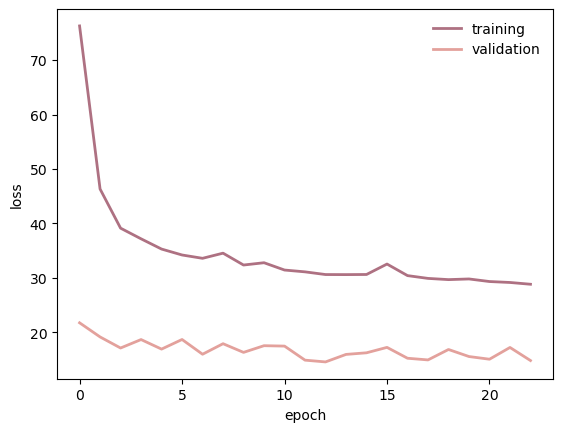

In [113]:
plt.plot(np.arange(len(train_losses)), train_losses, color='#AE7182', linewidth=2, label=r'training')
plt.plot(np.arange(len(val_losses)), val_losses, color='#e3a19c', linewidth=2, label=r'validation')
plt.xlabel(r'epoch')
plt.ylabel(r'loss')
plt.legend(frameon=False)

Let's look at the accuracy of our predictions:

In [119]:
with torch.no_grad():
    train_pred = training_std[-1]*mlp(torch.from_numpy(traindata[:, :8]).float()).numpy()+\
                    training_mean[-1]
train_true = training_std[-1]*traindata[:, -1]+\
                training_mean[-1]

Text(0, 0.5, 'pred [k$]')

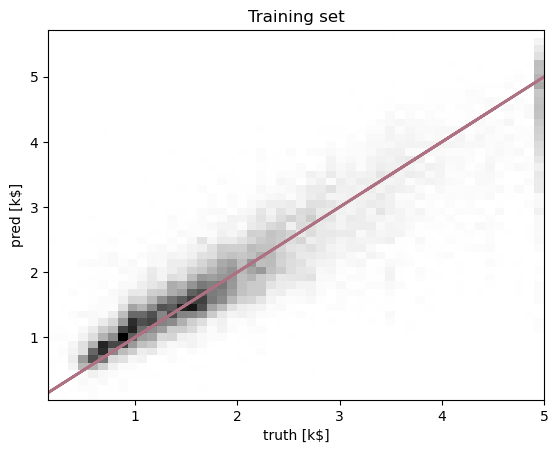

In [134]:
plt.title(r'Training set')
plt.hist2d(train_true, train_pred.flatten(), bins=50, cmap=plt.cm.binary)
plt.plot(train_true, train_true, color='#AE7182', linewidth=2)
plt.xlabel(r'truth [k$]')
plt.ylabel(r'pred [k$]')

In [132]:
with torch.no_grad():
    test_pred = training_std[-1]*mlp(torch.from_numpy(testdata[:, :8]).float()).numpy()+\
                    training_mean[-1]
test_true = training_std[-1]*testdata[:, -1]+\
                training_mean[-1]

Text(0, 0.5, 'pred [k$]')

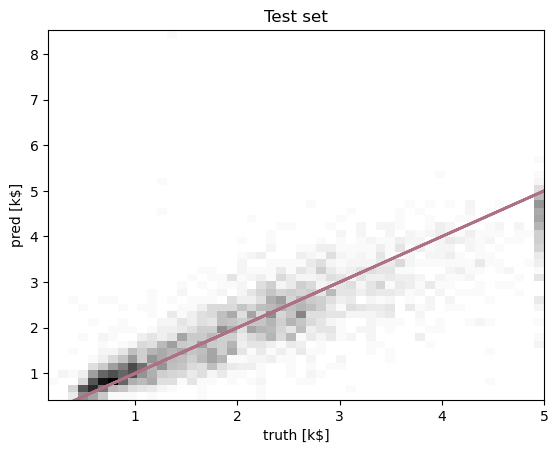

In [135]:
plt.title(r'Test set')
plt.hist2d(test_true, test_pred.flatten(), bins=50, cmap=plt.cm.binary)
plt.plot(test_true, test_true, color='#AE7182', linewidth=2)
plt.xlabel(r'truth [k$]')
plt.ylabel(r'pred [k$]')

### Example: unsupervised learning - $k$ means clustering

One of the key applications of unsupervised learning is to find patterns in data. Let us look at the simplest such algorithm, namely $k$-means clustering, where we aim to organize data into groups whose members are similar.

Let us assume that we have an unlabeled $d$-dimensional data set $\{\boldsymbol{x}_i=(x_{1i}, x_{di})\}_{i=1}^{n}$ of length $n$. We would now like to partition these data into a known number of $k$ clusters.

We can label each cluster by a $d$-dimensional vector $\boldsymbol{\mu}_k$. Our goal is to find an assignment of data points to these clusters and the associated vectors $\boldsymbol{\mu}_k$ given a pre-specified number of clusters $k$. Ideally, we would like the members of each cluster to be close to each other and far from all the other clusters.

We can formaliase this by introducing the so-called distortion function $$J=\sum_{i=1}^{n}\sum_{j=1}^{k}r_{ij}|\boldsymbol{x}_i-\boldsymbol{\mu}_j|^2,$$ which quantifies the sum of the squared differences of each data point to  the $\boldsymbol{\mu}_j$ for the cluster it belongs to.

In order to minimize $J$ we can proceed as follows:
1. Given a number $k$ of clusters, randomly initialize the $\boldsymbol{\mu}_j$.
2. Minimize $J$ with respect to $r_{ij}$, keeping $\boldsymbol{\mu}_j$ fixed.
3. Minimize $J$ with respect to $\boldsymbol{\mu}_j$, keeping $r_{ij}$ fixed.
4. Repeat steps 2 and 3 until convergence.

Step 2: We can minimize $J$ with respect to $r_{ij}$ by assigning each data point to its nearest cluster, i.e. $$r_{ij}=\begin{cases}
      1, & \text{if}\ j=\underset{l}{\mathrm{argmin}} |\boldsymbol{x}_i-\boldsymbol{\mu}_l|^2  \\
      0, & \text{otherwise}
    \end{cases}.$$
    
Step 3: We can minimize $J$ with respect to $\boldsymbol{\mu}_j$ by setting it to $$\boldsymbol{\mu}_j=\frac{\sum_i r_{ij}\boldsymbol{x}_i}{\sum_i r_{ij}},$$ i.e. to the mean of all the members in the cluster.

This algorithm is guaranteed to converge (not necessarily to the global minimum), as $J$ is monotonically decreasing with each update step. Therefore, no realization of clusters can be visited twice, and since the number of possible clusterings is finite, the algorithm must necessarily terminate.

Let us look at an example of $k$-means clustering for $d=2$.

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec

Let us first generate some data consisting of three Gaussian blobs.

Text(0, 0.5, '$y$')

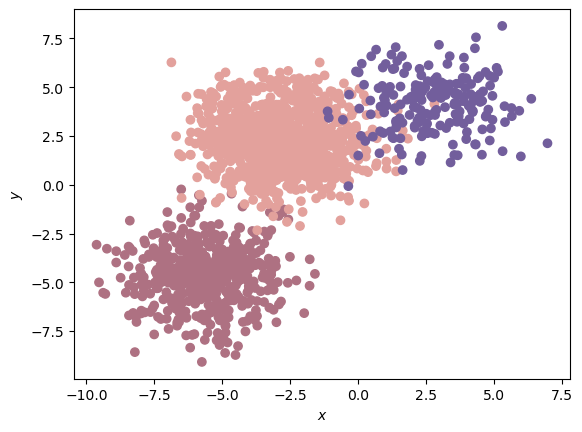

In [58]:
n_samples = 3000
random_state = 250

# Equal variances
stds = [1.5, 1.5, 1.5]
# Unequal variances
stds = [1.0, 2.5, 0.5]

X, y = make_blobs(n_samples=n_samples, cluster_std=stds, random_state=random_state) 
X = np.vstack((X[y == 0][:500], X[y == 1][:1000], X[y == 2][:200]))
y = ['#AE7182'] * 500 + ['#e3a19c'] * 1000 + ['#725e9c'] * 200

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Let's now use `scikit-learn` to run $k$-means clustering on those data.

Text(0, 0.5, '$y$')

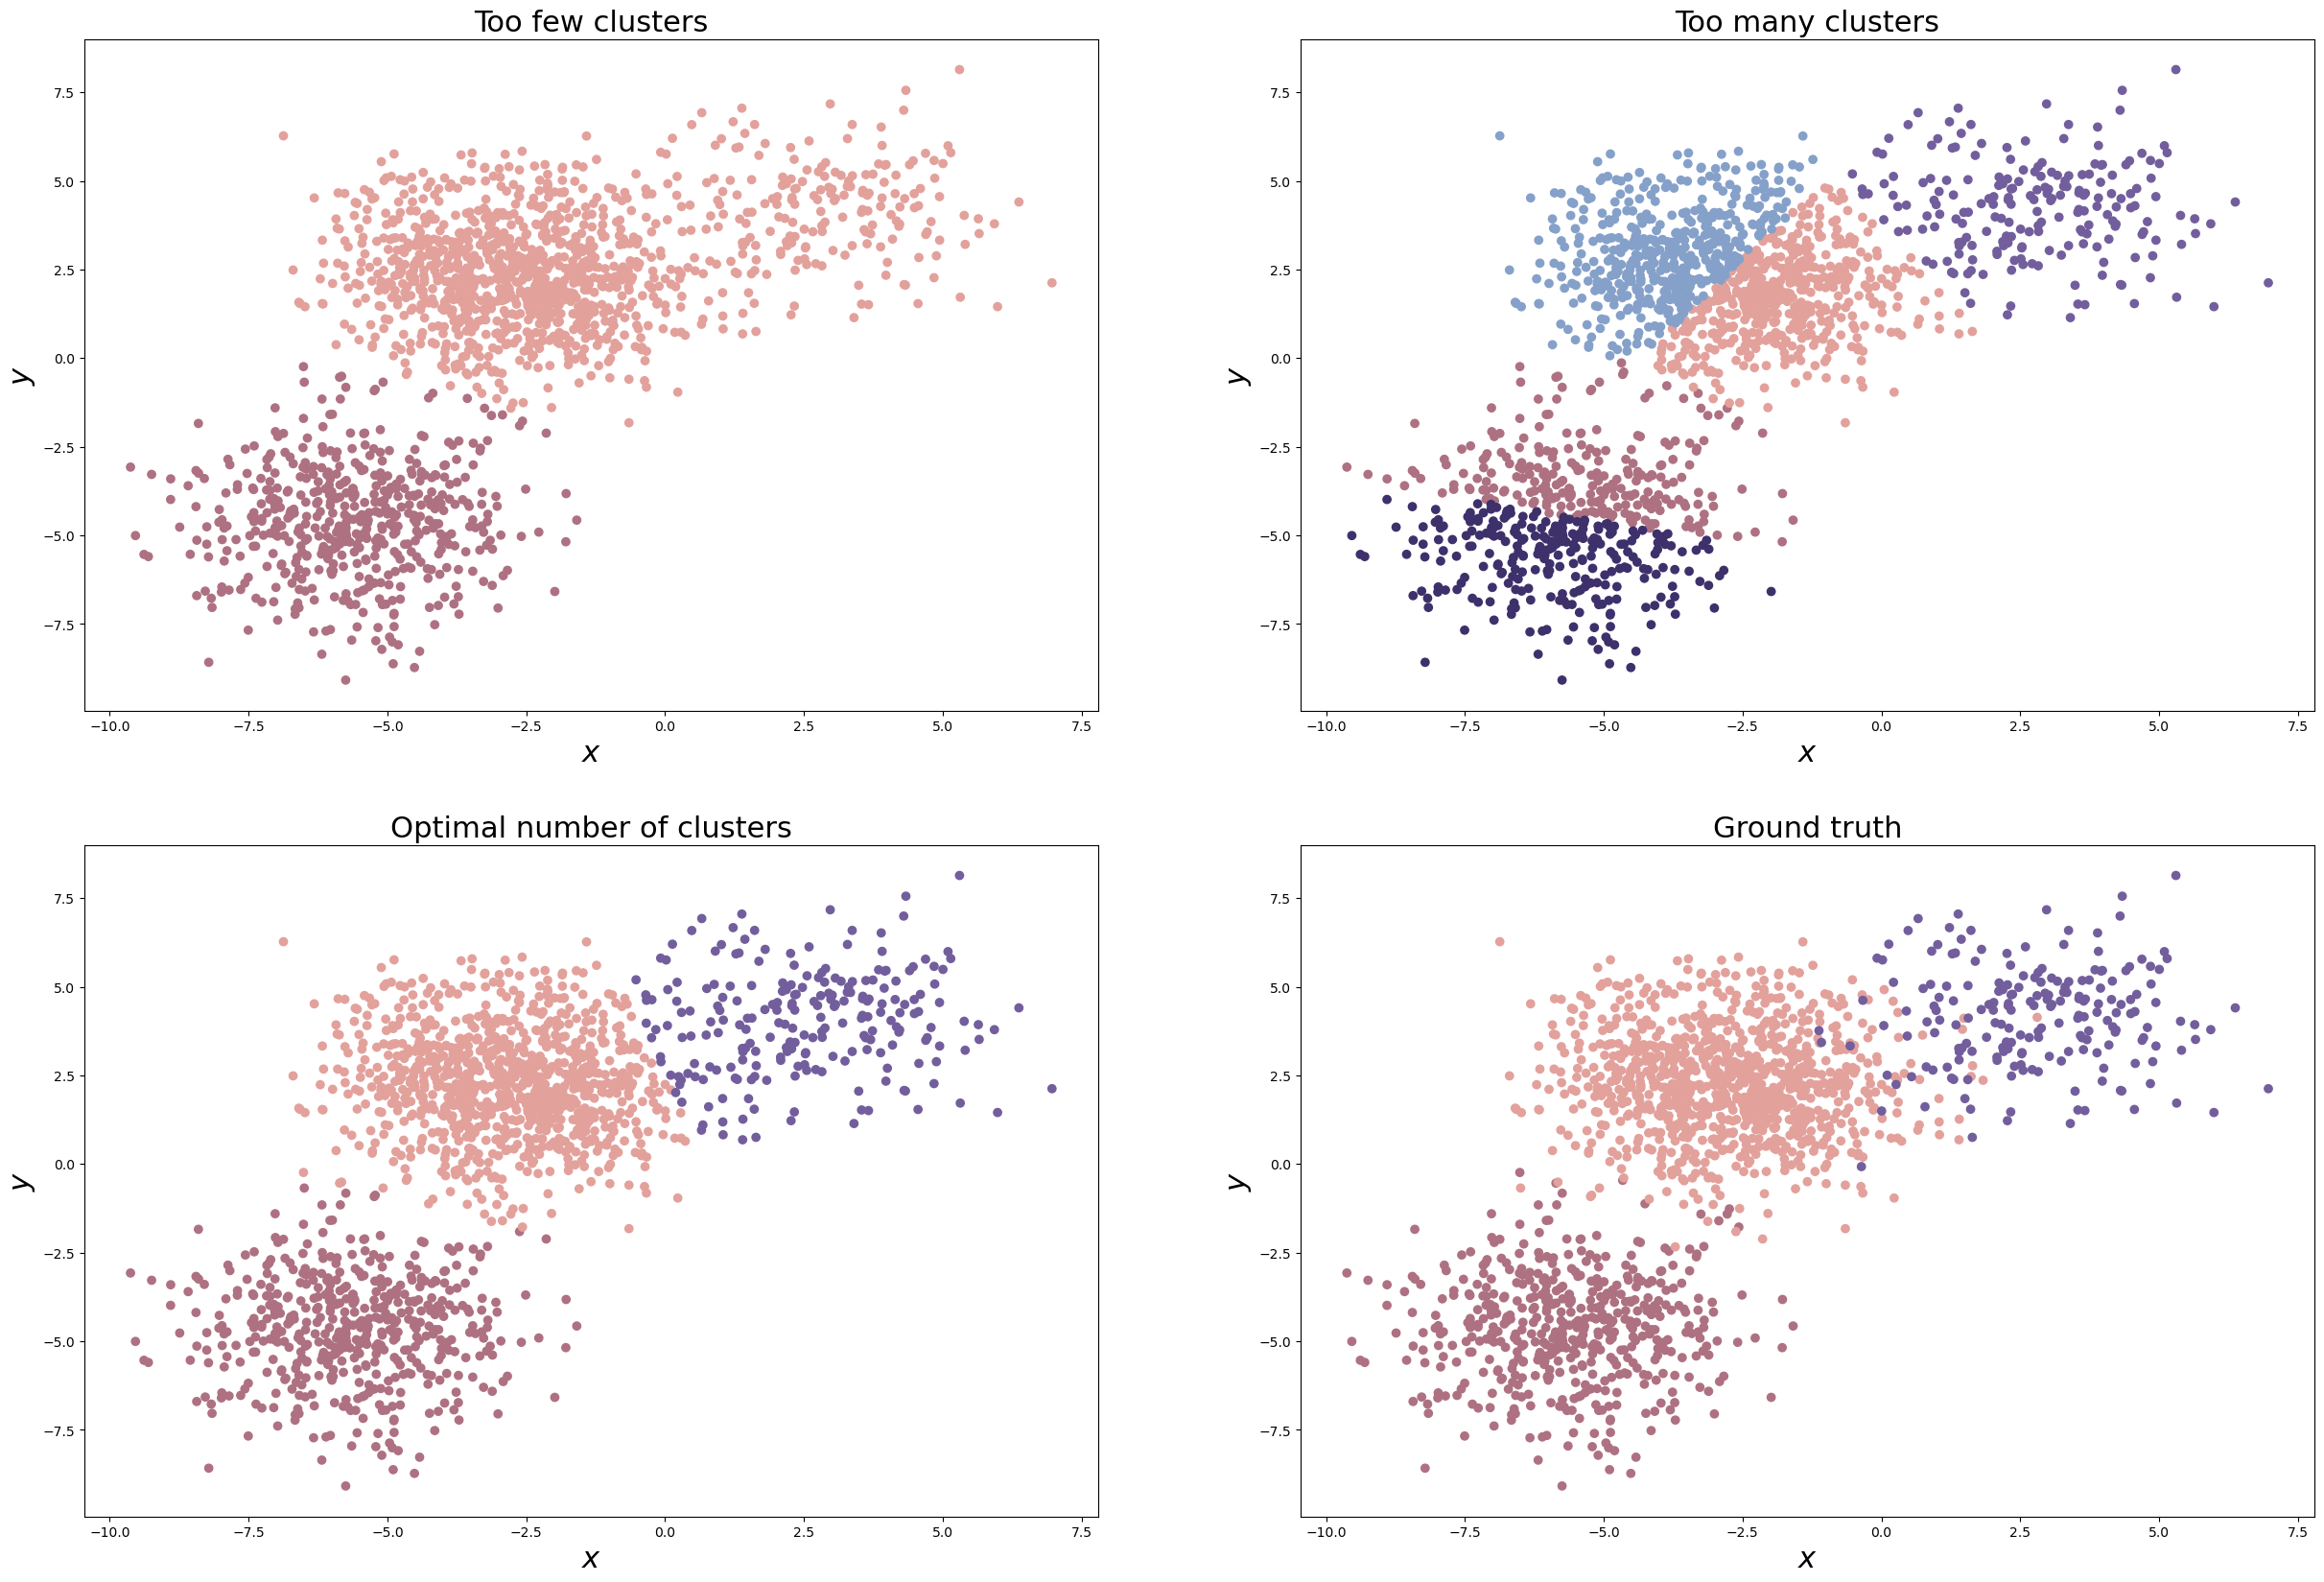

In [59]:
common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig = plt.figure(figsize=(30, 20))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
X_temp = np.vstack((X[y_pred == 0], X[y_pred == 1]))
y_pred = ['#AE7182'] * np.sum(y_pred==0) + ['#e3a19c'] * np.sum(y_pred==1) 
ax1.scatter(X_temp[:, 0], X_temp[:, 1], c=y_pred)
ax1.set_title('Too few clusters', fontsize=22)
ax1.set_xlabel(r'$x$', size=22)
ax1.set_ylabel(r'$y$', size=22)

y_pred = KMeans(n_clusters=5, **common_params).fit_predict(X)
X_temp = np.vstack((X[y_pred == 0], X[y_pred == 1], X[y_pred == 2], X[y_pred == 3], X[y_pred == 4]))
y_pred = ['#AE7182'] * np.sum(y_pred==0) + ['#e3a19c'] * np.sum(y_pred==1) + ['#725e9c'] * np.sum(y_pred==2) +\
            ['#3d306b'] * np.sum(y_pred==3) + ['#85a1ca'] * np.sum(y_pred==4)
ax2.scatter(X_temp[:, 0], X_temp[:, 1], c=y_pred)
ax2.set_title('Too many clusters', fontsize=22)
ax2.set_xlabel(r'$x$', size=22)
ax2.set_ylabel(r'$y$', size=22)

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
X_temp= np.vstack((X[y_pred == 0], X[y_pred == 1], X[y_pred == 2]))
y_pred = ['#AE7182'] * np.sum(y_pred==0) + ['#e3a19c'] * np.sum(y_pred==1) + ['#725e9c'] * np.sum(y_pred==2)
ax3.scatter(X_temp[:, 0], X_temp[:, 1], c=y_pred)
ax3.set_title('Optimal number of clusters', fontsize=22)
ax3.set_xlabel(r'$x$', size=22)
ax3.set_ylabel(r'$y$', size=22)

ax4.scatter(X[:, 0], X[:, 1], c=y)
ax4.set_title('Ground truth', fontsize=22)
ax4.set_xlabel(r'$x$', size=22)
ax4.set_ylabel(r'$y$', size=22)

As we can see, the algorithm does a pretty good job for the equal variance case, but $k$-means clustering can struggle significantly if the intial blobs have significantly different variances as the underlying assumption of the algorithm is that the variances of the different clusters are the same (or very similar). 

An algorithm that can overcome this limitation of $k$-means clustering are Gaussian Mixture Models, which make the variance of the clusters an explicit parameter.